In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

### Preparing the dataset

In [2]:
# Load and preprocess wine dataset
wine_full_df = pd.read_csv("wine.csv")
wine_df = wine_full_df.drop(columns=['Wine Variety'])

In [3]:
wine_df[['Total Phenols', "Flavanoids"]]

,Total Phenols,Flavanoids
0,2.80,3.06
1,2.65,2.76
2,2.80,3.24
3,3.85,3.49
4,2.80,2.69
...,...,...
173,1.68,0.61
174,1.80,0.75
175,1.59,0.69
176,1.65,0.68


In [4]:
wine_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Wine Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
col1 = "Total Phenols"
col2 = "Proanthocyanins"
new_df = wine_df[[col1, col2]]
new_df

,Total Phenols,Proanthocyanins
0,2.80,2.29
1,2.65,1.28
2,2.80,2.81
3,3.85,2.18
4,2.80,1.82
...,...,...
173,1.68,1.06
174,1.80,1.41
175,1.59,1.35
176,1.65,1.46


<Axes: xlabel='Total Phenols', ylabel='Proanthocyanins'>

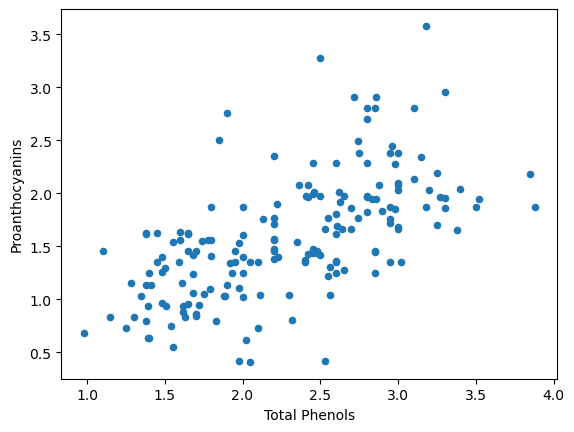

In [6]:
new_df.plot.scatter(col1, col2)

### Hierarchical Clustering

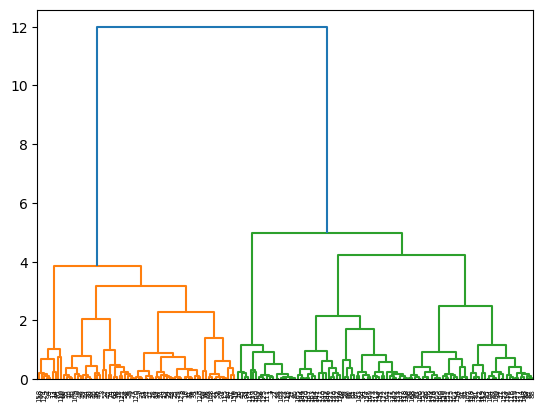

In [7]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

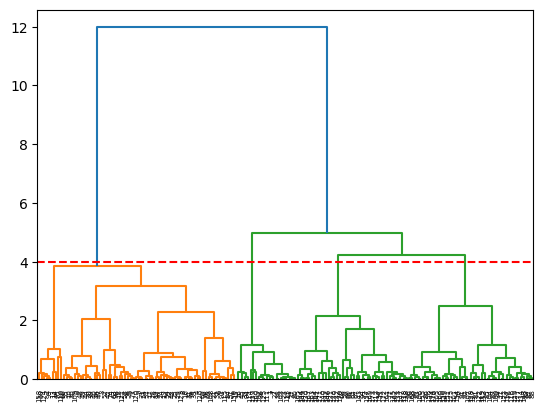

In [8]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))
# plot horizontal line
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

In [9]:
agg_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<Axes: xlabel='Total Phenols', ylabel='Proanthocyanins'>

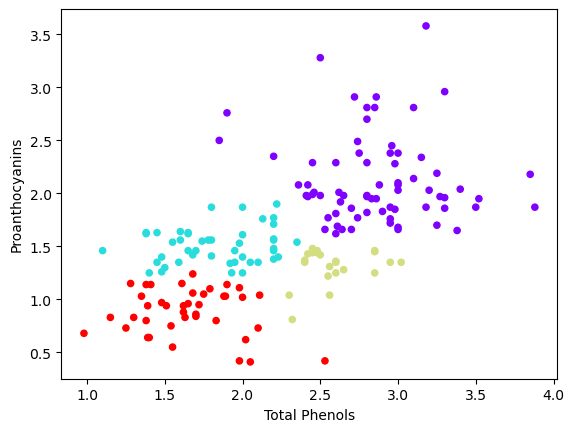

In [10]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

### KMeans

In [11]:
inertias = []
k_range = range(2, 17)

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto").fit(new_df)
    inertias.append([k, km_model.inertia_])
    
inertias

[[2, 52.86496929407227],
 [3, 38.11711225225667],
 [4, 29.558280606060585],
 [5, 25.40869191383193],
 [6, 19.695694027593373],
 [7, 16.762901795263556],
 [8, 14.752037891737887],
 [9, 13.94062162749288],
 [10, 11.34776522884523],
 [11, 11.206127474863049],
 [12, 9.60300733171418],
 [13, 8.19852711677815],
 [14, 7.879744856933999],
 [15, 8.841855262874384],
 [16, 7.267524352793746]]

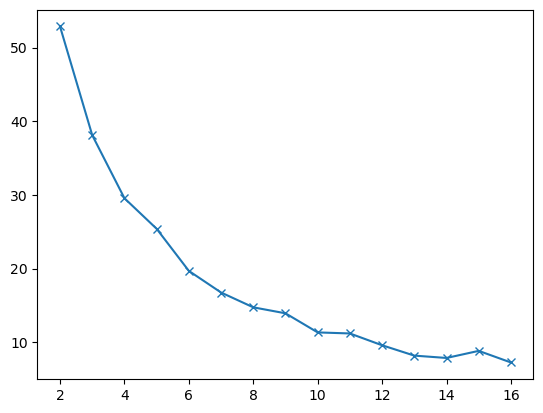

In [12]:
inertias = np.array(inertias)
plt.plot(inertias[:,0], inertias[:,1], 'x-')
plt.show()

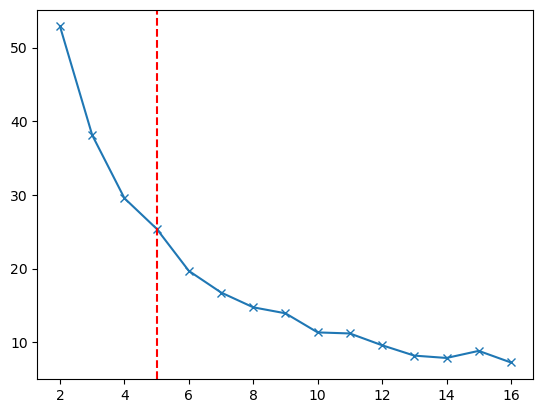

In [13]:
plt.plot(inertias[:,0], inertias[:,1], 'x-')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

<Axes: xlabel='Total Phenols', ylabel='Proanthocyanins'>

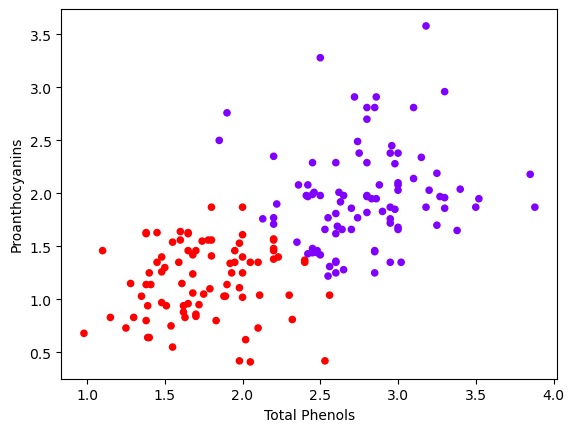

In [14]:
km_model = KMeans(n_clusters=2, n_init="auto").fit(new_df)
new_df.plot.scatter(col1, col2, c = km_model.labels_, cmap="rainbow", colorbar=False)

In [15]:
highest_score = -1
k_with_highest_score = -1
for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto').fit(new_df)
    km_labels = km_model.predict(new_df)
    avg = silhouette_score(new_df, km_labels)
    print((k, round(avg, 4)))
    
    if avg > highest_score:
        highest_score = avg
        k_with_highest_score = k

(2, 0.4859)
(3, 0.369)
(4, 0.3776)
(5, 0.3835)
(6, 0.345)
(7, 0.3496)
(8, 0.3585)
(9, 0.3654)
(10, 0.3776)
(11, 0.3795)
(12, 0.3164)
(13, 0.3795)
(14, 0.3708)
(15, 0.3389)
(16, 0.3579)


In [16]:
highest_score

0.4858502706036577

In [17]:
k_with_highest_score

2

In [18]:
km_model = KMeans(n_clusters=2, n_init='auto').fit(new_df)

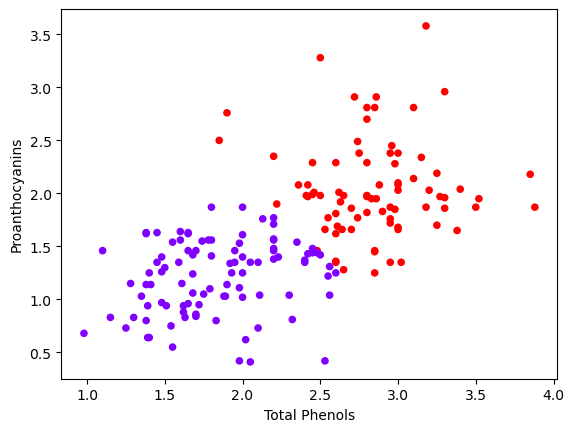

In [19]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()